[3 Points] In groups, you should select a convolutional neural network model that has been pre-trained on a large dataset (preferably, ImageNet). These already trained models are readily available online through many mechanisms, including the keras.application package (Inception, Xception, VGG etc.) https://keras.io/api/applications/Links to an external site.  
It is recommended to select a model with somewhat simple structure, like VGG. This can help to simplify how to extract specific filters and inputs to filters later on.  
 Explain the model you chose and why.  Classify a few images with pre-trained network to verify that it is working properly.

chose the VGG model  for the following reasons:

1.Simple Architecture: VGG features a relatively straightforward and layered structure, which makes it easier to extract and analyze specific convolution filters and their corresponding inputs and outputs.

2.Availability of Pre-trained Models: The model has been extensively pre-trained on a large-scale dataset such as ImageNet, ensuring reliable performance in practical applications and experiments.

3.Ease of Detailed Analysis: Given that VGG's network parameters and architecture are well-documented and transparent, its simple design facilitates understanding how convolution operations propagate information through the network. This is particularly important for analyzing the internal mechanisms of deep circuits.

In [1]:
# load the model and packages
# watermark the notebook
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

import sys
import tensorflow.keras
import scipy as sp
import tensorflow as tf
import platform
import numpy as np
import matplotlib.pyplot as plt

print(f"Python Platform: {platform.platform()}")
print(f"Tensor Flow Version: {tf.__version__}")
print(f"Keras Version: {tensorflow.keras.__version__}")
print()
print(f"Python {sys.version}")

gpus = tf.config.list_physical_devices('GPU')
print("GPU Resources Available:\n\t",gpus)

# getting rid of the warning messages about optimizer graph
tf.get_logger().setLevel('ERROR')
tf.autograph.set_verbosity(3)


Python Platform: macOS-15.3.2-arm64-arm-64bit
Tensor Flow Version: 2.19.0
Keras Version: 3.9.0

Python 3.11.7 (main, Dec 15 2023, 12:09:56) [Clang 14.0.6 ]
GPU Resources Available:
	 []


# load the model

In [2]:
from tensorflow.keras.applications.vgg19 import VGG19, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image

# Load the VGG19 model pre-trained on ImageNet
model = VGG19(weights='imagenet')
model.summary()


Model: "vgg19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,31

 Total params: 143,667,240 (548.05 MB)

 Trainable params: 143,667,240 (548.05 MB)

 Non-trainable params: 0 (0.00 B)

# load the example image

Image tensor shape: (1, 224, 224, 3)


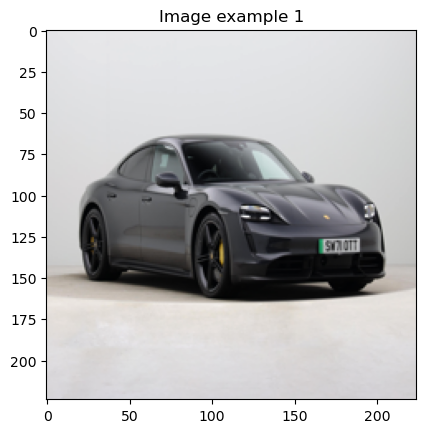

In [11]:
# This part of code have reference the 
# lecture example: https://github.com/8000net/LectureNotesMaster/blob/master/04%20LectureVisualizingConvnets.ipynb

img_url = 'https://raw.githubusercontent.com/CS-8321-Mach-Lrng-Neural-Ntwrks/Lab-3/main/example_1.jpeg'

# preprocess the image into a 4D tensor
import numpy as np
import requests
from io import BytesIO
from PIL import Image

def load_image_as_array(url, size=(224, 224)):  # updated size for VGG19
    response = requests.get(url)  # download
    img = Image.open(BytesIO(response.content)).convert("RGB")  # ensure 3 channels
    img = img.resize(size)  # resize with PIL
    return np.array(img).astype(float)  # return as numpy float array

def prepare_image_for_display(img, norm_type='max'):
    if norm_type == 'max':
        # min/max scaling
        new_img = (img - img.min()) / (img.max() - img.min())
    else:
        # standard score scaling
        new_img = ((img - img.mean()) / (img.std() + 1e-3)) * 0.15 + 0.5

    new_img *= 255
    new_img = np.clip(new_img, 0, 255)

    if len(new_img.shape) > 3:
        new_img = np.squeeze(new_img)

    return new_img.astype('uint8')

# Load and preprocess the image
img_tensor = load_image_as_array(img_url)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.  # Normalize to [0,1]

# Its shape is (1, 224, 224, 3)
print("Image tensor shape:", img_tensor.shape)

import matplotlib.pyplot as plt

plt.imshow(prepare_image_for_display(img_tensor))
plt.title('Image example 1')
plt.show()

In [14]:
def classify_image(url, model):
    img_array = load_image_as_array(url)
    img_tensor = np.expand_dims(img_array, axis=0)
    img_tensor = preprocess_input(img_tensor)

    # Show image
    plt.imshow(Image.open(BytesIO(requests.get(url).content)))
    plt.axis('off')
    plt.title('Input Image')
    plt.show()

    # Predict
    preds = model.predict(img_tensor)
    decoded = decode_predictions(preds, top=3)[0]
    print("Top 3 Predictions:")
    for i, (imagenet_id, label, prob) in enumerate(decoded):
        print(f"{i+1}: {label} ({prob:.4f})")
    

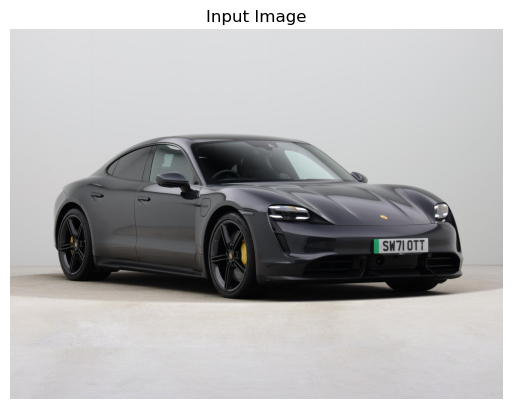

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
Top 3 Predictions:
1: sports_car (0.5925)
2: racer (0.2602)
3: car_wheel (0.0540)


In [17]:
classify_image('https://raw.githubusercontent.com/CS-8321-Mach-Lrng-Neural-Ntwrks/Lab-3/main/example_1.jpeg', model)

In [ ]:
classify_image('https://raw.githubusercontent.com/CS-8321-Mach-Lrng-Neural-Ntwrks/Lab-3/main/example_1.jpeg', model)